In [6]:
import numpy as np

import matplotlib.pyplot as plt

## Boosting with Decision Trees - Naive implementation

In [24]:
# Creating some data to use
noise = 0.005
X_base = np.linspace(-100, 100, num=60)
X = X_base.reshape(-1, 1)

y = np.sin(2*(X**2) + X + 3 + 0.2*noise + 1/X)

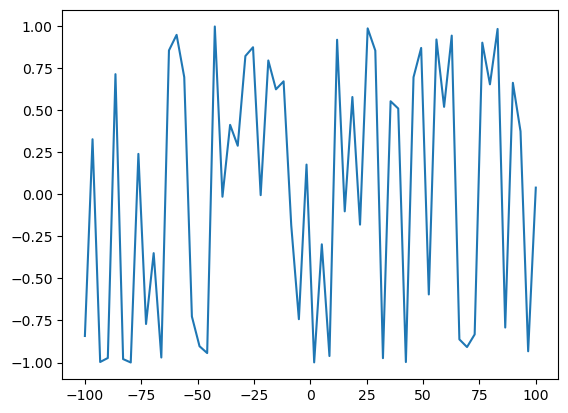

In [25]:
plt.plot(X_base, y)
plt.show()

In [22]:
from sklearn.tree import DecisionTreeRegressor

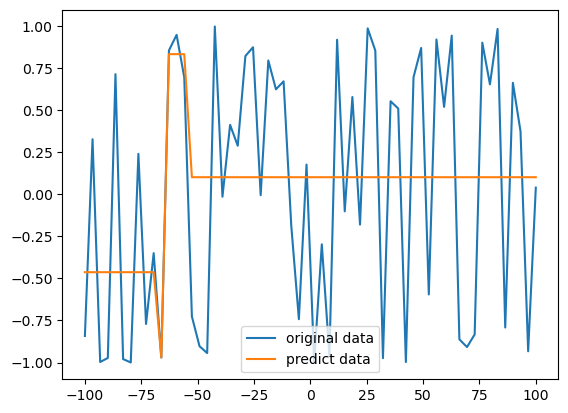

In [37]:
dt1 = DecisionTreeRegressor(max_depth=2)
dt1.fit(X, y)

y_dt1 = dt1.predict(X)

plt.plot(X, y, label="original data")
plt.plot(X, y_dt1, label="predict data")

plt.legend()
plt.show()

In [38]:
y - y_dt1

array([-0.37953989,  0.79097378, -0.53420038, -0.51040024,  1.17810598,
       -0.51692357, -0.53708722,  0.70386213, -0.30815839,  0.11336781,
        0.        ,  0.02220273,  0.11477176, -0.13697449, -0.82862155,
       -1.00560599, -1.04623793,  0.89670989, -0.11610251,  0.3114484 ,
        0.18709585,  0.72083158,  0.77317489, -0.10682191,  0.69436741,
        0.5228606 ,  0.57044789, -0.28604742, -0.84470997,  0.07510063,
       -1.1016885 , -0.39921679, -1.06383333,  0.81774814, -0.20312371,
        0.47716373, -0.28210784,  0.88547628,  0.75330361, -1.07658766,
        0.45186845,  0.40852888, -1.09960296,  0.59476075,  0.76897044,
       -0.69739042,  0.81943225,  0.41857071,  0.84239856, -0.96465114,
       -1.01041088, -0.93527905,  0.80034504,  0.55259517,  0.88209494,
       -0.89429058,  0.56162477,  0.2729192 , -1.03555741, -0.0619505 ])

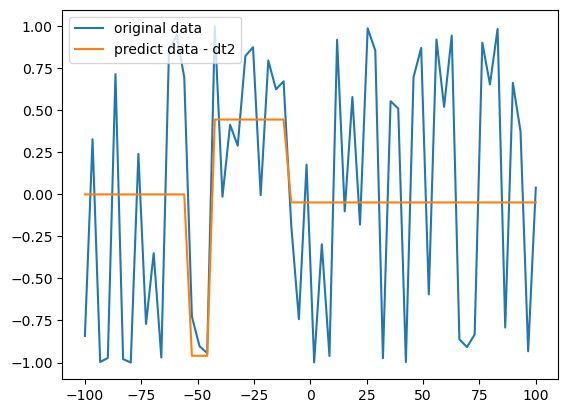

In [39]:
y2 = y - y_dt1
dt2 = DecisionTreeRegressor(max_depth=2)
dt2.fit(X, y2)

y_dt2 = dt2.predict(X)

plt.plot(X, y, label="original data")
plt.plot(X, y_dt2, label="predict data - dt2")

plt.legend()
plt.show()

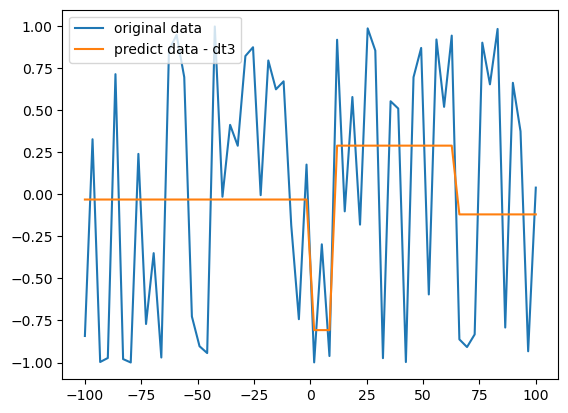

In [40]:
y3 = y2 - y_dt2
dt3 = DecisionTreeRegressor(max_depth=2)
dt3.fit(X, y3)

y_dt3 = dt3.predict(X)

plt.plot(X, y, label="original data")
plt.plot(X, y_dt3, label="predict data - dt3")

plt.legend()
plt.show()

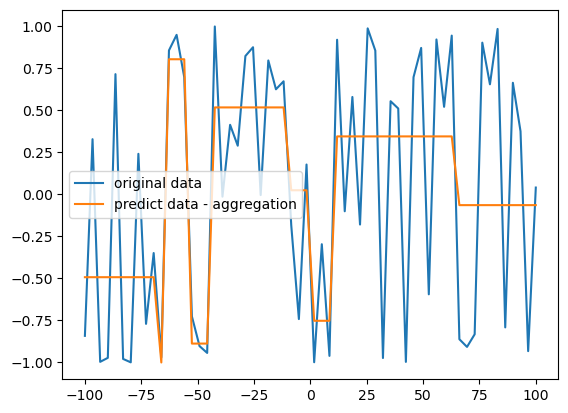

In [41]:
# Final prediction 
y_pred = sum(tree.predict(X) for tree in (dt1, dt2, dt3))

plt.plot(X, y, label="original data")
plt.plot(X, y_pred, label="predict data - aggregation")

plt.legend()
plt.show()

## Using Gradient Boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

In [48]:
# Creating some data to use
noise = 0.005
X_base = np.linspace(-100, 100, num=60)
X = X_base.reshape(-1, 1)

y = np.sin(2*(X**2) + X + 3 + 0.2*noise + 1/X)
y_ravel = np.ravel(y)

In [49]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)
gb_reg.fit(X, y_ravel)

GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3)

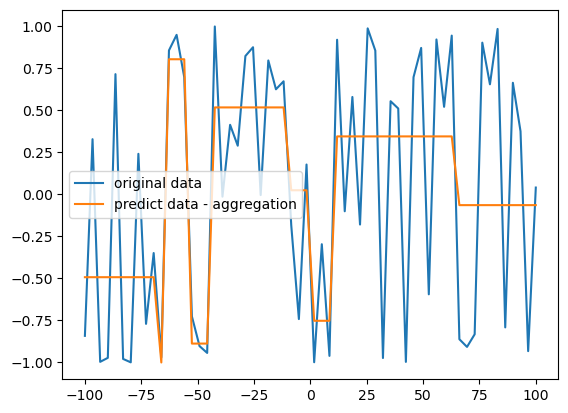

In [50]:
y_pred_gbreg = gb_reg.predict(X)

plt.plot(X, y_ravel, label="original data")
plt.plot(X, y_pred_gbreg, label="predict data - aggregation")

plt.legend()
plt.show()

### More deep GB

The learning_rate hyperparameter scales the contribution of each tree. If you set it to a low value, such as 0.1 , you will need more trees in  the ensemble to fit the training set, but the predictions will usually generalize better.

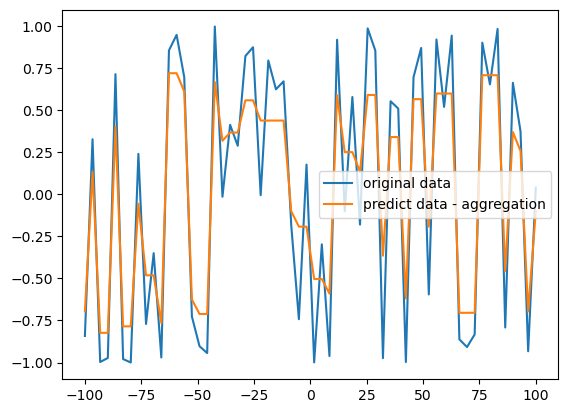

In [56]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=150, learning_rate=0.1)
gb_reg.fit(X, y_ravel)

y_pred_gbreg = gb_reg.predict(X)

plt.plot(X, y_ravel, label="original data")
plt.plot(X, y_pred_gbreg, label="predict data - aggregation")

plt.legend()
plt.show()

50


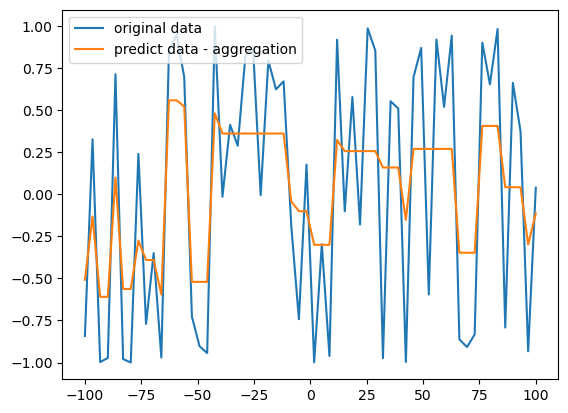

...
100


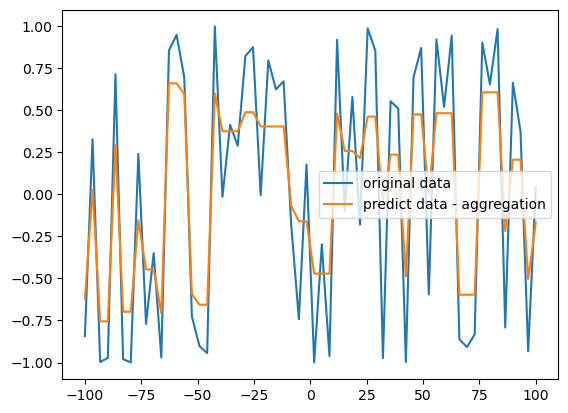

...
150


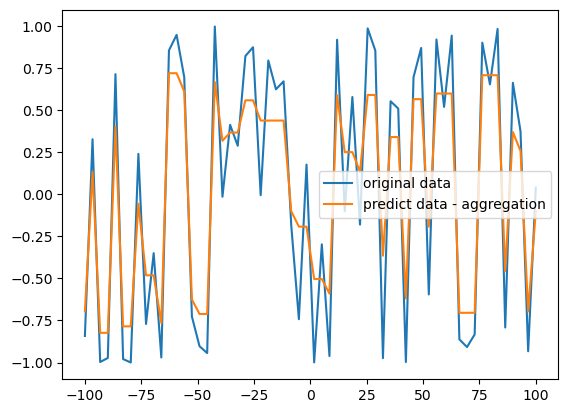

...
200


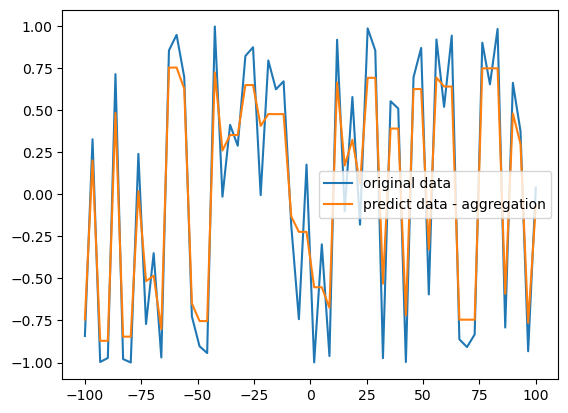

...
300


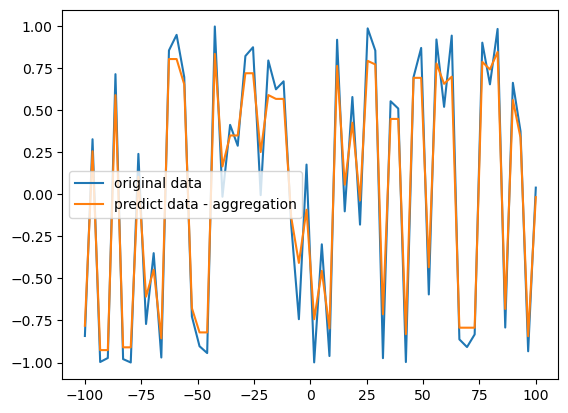

...
500


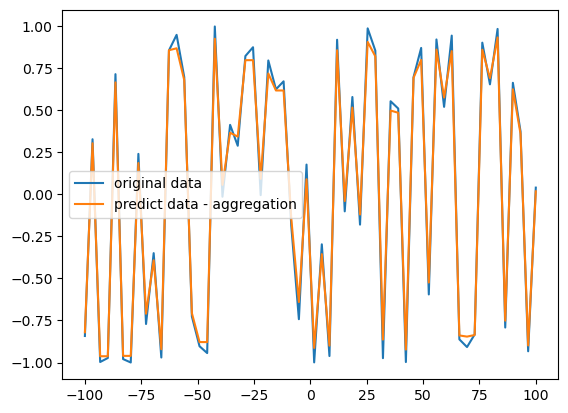

...


In [57]:
for n in [50, 100, 150, 200, 300, 500]:
    print(n)
    gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=n, learning_rate=0.1)
    gb_reg.fit(X, y_ravel)

    y_pred_gbreg = gb_reg.predict(X)

    plt.plot(X, y_ravel, label="original data")
    plt.plot(X, y_pred_gbreg, label="predict data - aggregation")

    plt.legend()
    plt.show()
    print("...")

### Finding the best n_estimators

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [59]:
X_train, X_val, y_train, y_val = train_test_split(X, y_ravel)

In [60]:
X_train.shape, X_val.shape

((45, 1), (15, 1))

bst_n_estimators: 499
RMSE: 1.0886913439527952


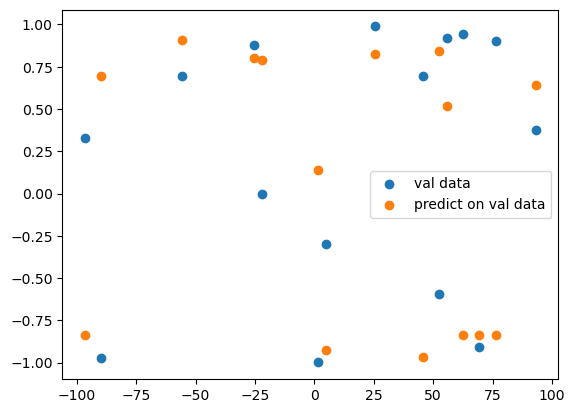

...


In [68]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=500, learning_rate=0.1)
gb_reg.fit(X, y_ravel)

errors = [mean_squared_error(y_val, y_pred)
            for y_pred in gb_reg.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors) + 1
print("bst_n_estimators:", bst_n_estimators)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators)
gbrt_best.fit(X_train, y_train)

y_pred_gbreg = gbrt_best.predict(X_val)

print(f"RMSE: {np.sqrt(mean_squared_error(y_val, y_pred_gbreg))}")

plt.scatter(X_val, y_val, label="val data")
plt.scatter(X_val, y_pred_gbreg, label="predict on val data")

plt.legend()
plt.show()
print("...")

RMSE on Train: 0.02448529093899911


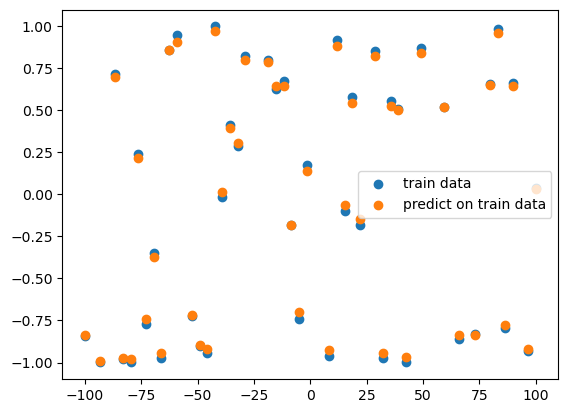

In [69]:
y_pred_gbreg_train = gbrt_best.predict(X_train)

print(f"RMSE on Train: {np.sqrt(mean_squared_error(y_train, y_pred_gbreg_train))}")

plt.scatter(X_train, y_train, label="train data")
plt.scatter(X_train, y_pred_gbreg_train, label="predict on train data")

plt.legend()
plt.show()

### Looking at the error by n_estimators

In [82]:
gb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=1000, learning_rate=0.5)
gb_reg.fit(X, y_ravel)

errors = [mean_squared_error(y_val, y_pred)
            for y_pred in gb_reg.staged_predict(X_val)]

bst_n_estimators = np.argmin(errors) + 1

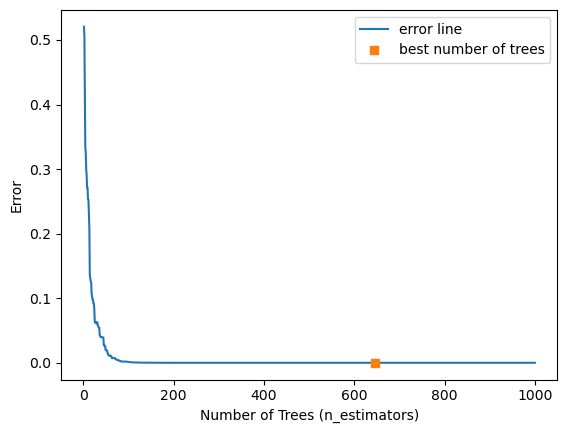

In [86]:
x0 = [bst_n_estimators]
y0 = [errors[bst_n_estimators]]

plt.plot(np.arange(1, len(errors)+1), errors, label="error line")
plt.plot(x0, y0, "s", label="best number of trees")

plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Error")
plt.legend()

plt.show()